<a href="https://colab.research.google.com/github/Rahul-tech-hub/CreditCardFraudDtetction/blob/main/Copy_of_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [23]:
#load dataset
creditcard = pd.read_csv('/content/creditcard.csv')

In [5]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25838.000000,25838.000000,25838.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,...,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000
mean,19376.128532,-0.225653,0.166976,0.723131,0.229368,-0.194354,0.079800,-0.128669,0.026060,0.441922,...,-0.037598,-0.132262,-0.039778,0.011174,0.129413,0.023418,0.013306,0.004153,75.808937,0.003406
std,11653.899424,1.889055,1.552796,1.684909,1.434242,1.436206,1.323018,1.319114,1.341622,1.269785,...,0.817316,0.641426,0.538789,0.590048,0.436213,0.516670,0.397674,0.280120,219.661154,0.058262
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7694.750000,-0.951266,-0.405158,0.279675,-0.683788,-0.779682,-0.662365,-0.594982,-0.164442,-0.384700,...,-0.249309,-0.552080,-0.173949,-0.325263,-0.133337,-0.338941,-0.065269,-0.008898,6.060000,0.000000
50%,22684.000000,-0.267973,0.176509,0.862364,0.204882,-0.224921,-0.179636,-0.067756,0.029393,0.358908,...,-0.097962,-0.106938,-0.049040,0.063000,0.167170,-0.052787,0.007047,0.019985,18.960000,0.000000
75%,30231.500000,1.166499,0.818206,1.489349,1.109950,0.320600,0.466671,0.446339,0.287518,1.200785,...,0.072314,0.276513,0.075082,0.399042,0.410283,0.306226,0.091845,0.076753,67.610000,0.000000
max,33787.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [6]:
#first 5 rows of dataset
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0
25837,33787,1.303469,0.498450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

In [9]:
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, height=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

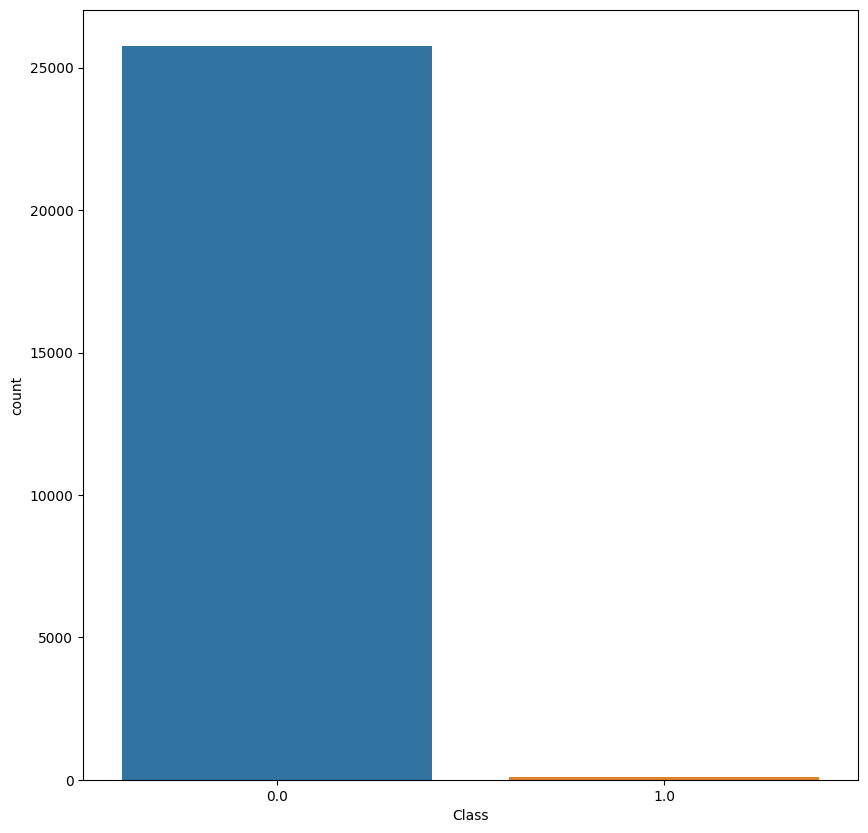

In [11]:
countplot_data(creditcard, creditcard.Class)

### What is relationship of fraud transactions with amount of money?
Let us try to determine the nature of transactions which are fraud and obtain a relevant set of the same with respect to their amount.
- We hypothesise based on our scatter plot that all fraud transactions occur for an amount less than 8000.


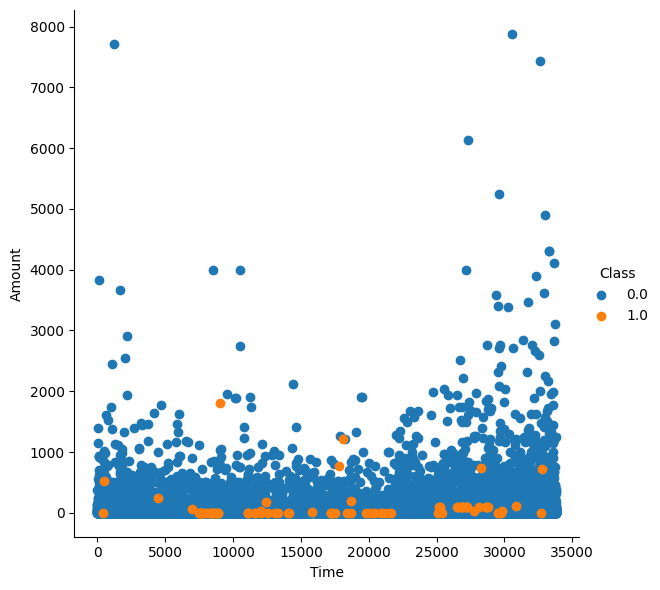

In [12]:
pairplot_data_grid(creditcard, "Time", "Amount", "Class")

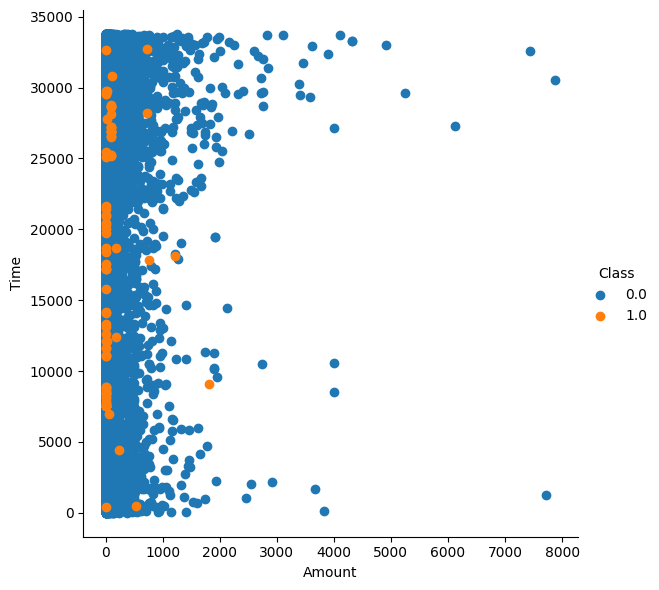

In [13]:
pairplot_data_grid(creditcard, "Amount", "Time", "Class")

In [14]:
amount_more = 0
amount_less = 0
for i in range(creditcard.shape[0]):
    if(creditcard.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)

35
25803


In [15]:
percentage_less = (amount_less/creditcard.shape[0])*100
percentage_less

99.86454059911757

In [16]:
fraud = 0
legitimate = 1
for i in range(creditcard.shape[0]):
    if(creditcard.iloc[i]["Amount"]<2500):
        if(creditcard.iloc[i]["Class"] == 0):
            legitimate += 1
        else:
            fraud+=1
print(fraud)
print(legitimate)

88
25716


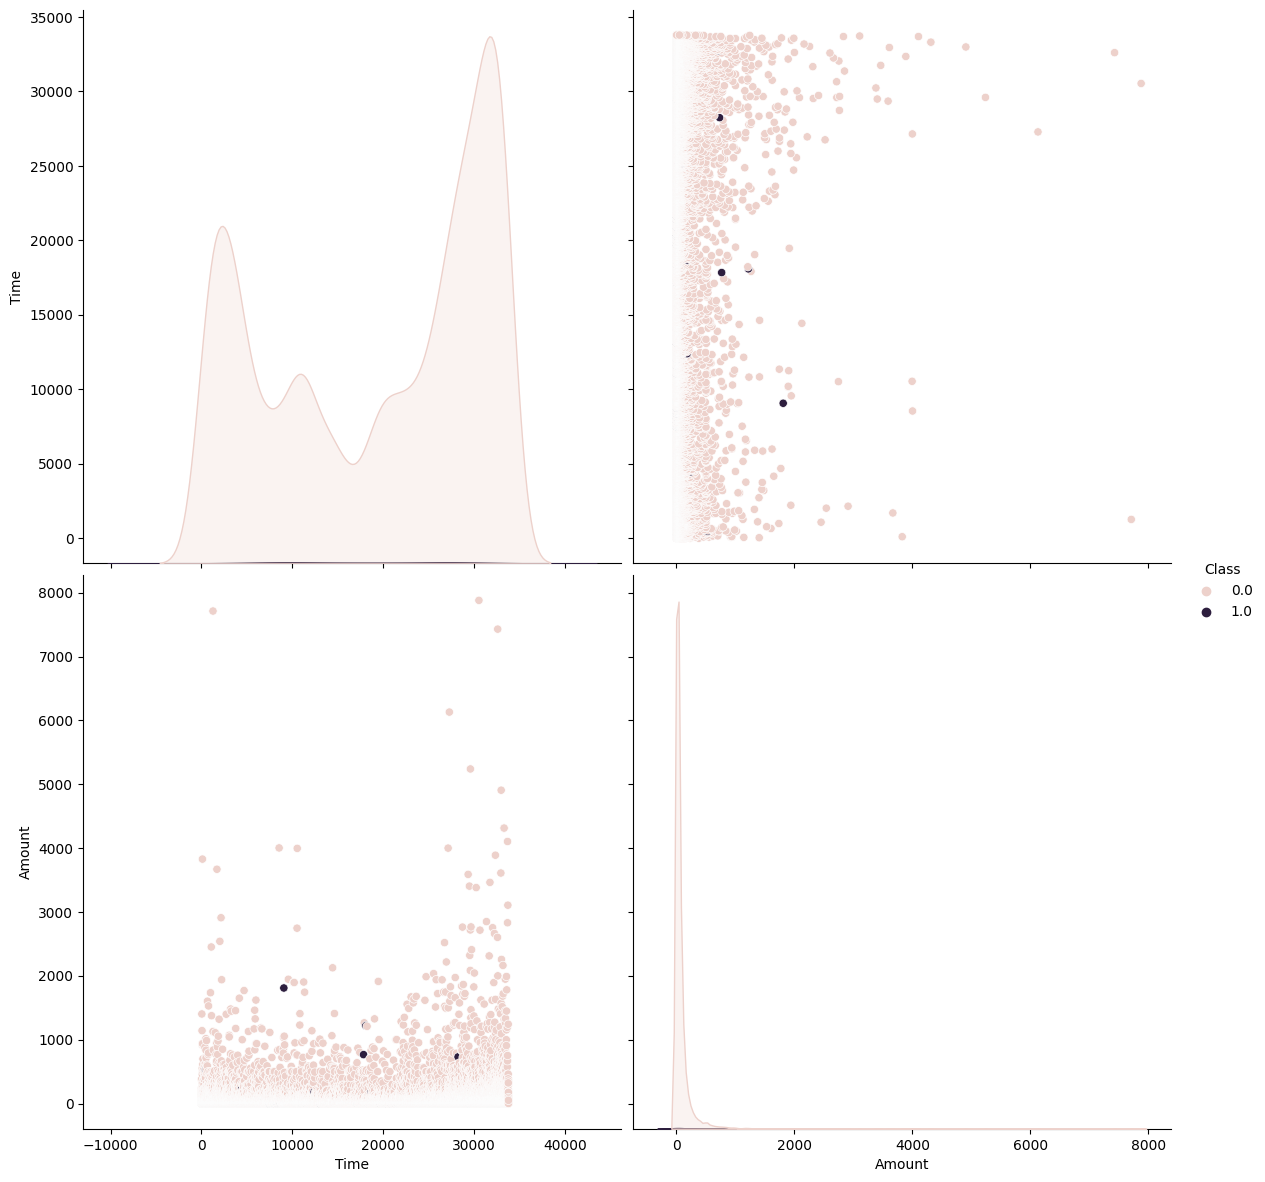

In [17]:

creditcard = creditcard[["Time", "Amount", "Class"]]
sns.pairplot(creditcard, hue="Class", size=6)
plt.show()

In [18]:
#Distribition of legit transaction and fraudulent transactions
creditcard['Class'].value_counts()


0.0    25749
1.0       88
Name: Class, dtype: int64

This Datset is higly Unbalanced

label o represents Normal Transaction

label 1 represents Fradulent Transaction


### What is the relationship between Time and Transactions?


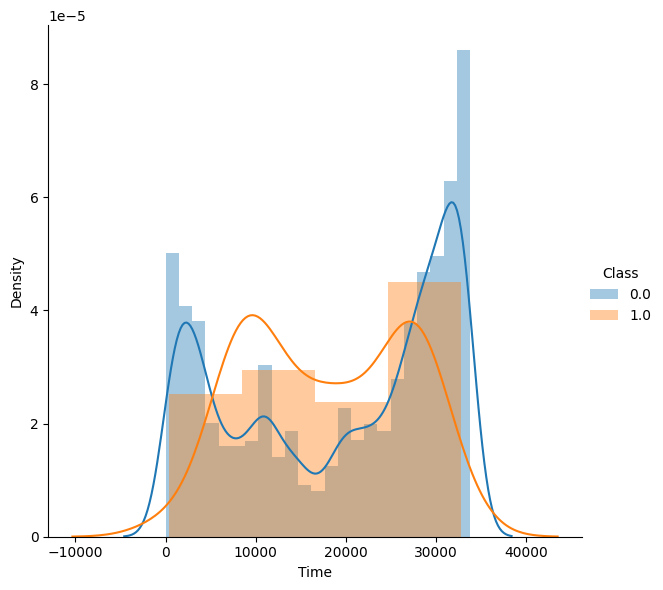

In [19]:
sns.FacetGrid(creditcard, hue="Class", height=6).map(sns.distplot,"Time").add_legend()
plt.show()

In [20]:
# Scaling the data: RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

creditcard['scaled_amount'] = rob_scaler.fit_transform(
    creditcard['Amount'].values.reshape(-1, 1))

creditcard['scaled_time'] = rob_scaler.fit_transform(
    creditcard['Time'].values.reshape(-1, 1))

creditcard.drop(['Time', 'Amount'], axis=1, inplace=True)

# visualize the data
creditcard.head()

,Class,scaled_amount,scaled_time
0,0.0,2.122827,-1.006534
1,0.0,-0.264338,-1.006534
2,0.0,5.844029,-1.006489
3,0.0,1.698457,-1.006489
4,0.0,0.829082,-1.006445


In [27]:
#separating data for analysis
legit = creditcard[creditcard.Class == 0]
fraud = creditcard[creditcard.Class == 1]

In [28]:
legit_sample = legit.sample(n=3)

In [29]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [30]:
X = new_dataset.drop(columns ='Class', axis = 1)
Y = new_dataset['Class']

Feature Scaling:

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [33]:
X.dropna(inplace=True)

Apply PCA

In [34]:
n_components = 2

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Explained Variance Ratio

In [35]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.37371878 0.15003426]


Choosing the Number of Components

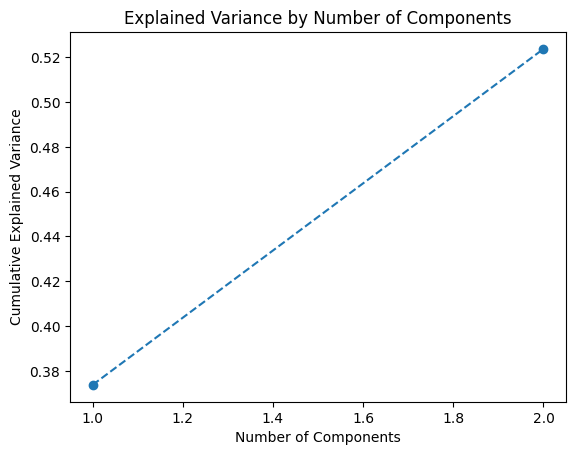

In [36]:
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance to help decide the number of components
plt.figure()
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

In [37]:
#separating data for analysis
legit = creditcard[creditcard.Class == 0]
fraud = creditcard[creditcard.Class == 1]

In [38]:
print(legit.shape)
print(fraud.shape)

(53417, 31)
(153, 31)


In [39]:
#statistical measures
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,...,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.000000,53417.0
mean,30011.818110,-0.222505,-0.014659,0.722511,0.163565,-0.242775,0.109604,-0.097131,0.042665,0.104805,...,-0.031568,-0.106396,-0.038408,0.008094,0.134794,0.019825,0.002289,0.003902,94.251260,0.0
std,13302.496683,1.786849,1.600372,1.287981,1.354456,1.340473,1.306501,1.146308,1.165246,1.179789,...,0.727607,0.636219,0.586314,0.596226,0.435720,0.500332,0.381795,0.328222,252.353693,0.0
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-4.532523,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.0
25%,23707.000000,-0.988481,-0.575484,0.219082,-0.727196,-0.870210,-0.633222,-0.602445,-0.147435,-0.625462,...,-0.230752,-0.528422,-0.178987,-0.322644,-0.128225,-0.330779,-0.063724,-0.006562,7.680000,0.0
50%,34255.000000,-0.244257,0.075200,0.793484,0.184175,-0.288513,-0.150162,-0.074160,0.058036,-0.010237,...,-0.066641,-0.082370,-0.051662,0.062415,0.174441,-0.074087,0.008665,0.022349,25.520000,0.0
75%,40124.000000,1.155180,0.727335,1.426590,1.054991,0.282634,0.495726,0.426468,0.331557,0.783852,...,0.108837,0.307692,0.078954,0.402008,0.421044,0.297038,0.082379,0.076166,86.650000,0.0
max,46048.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,18.709255,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,0.0


In [40]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,27472.241830,-7.468948,5.326389,-10.100308,5.793812,-5.528864,-2.230554,-7.865700,3.617647,-3.492917,...,0.891045,-0.218399,-0.277419,-0.084305,0.240593,0.136258,0.586389,0.028185,97.616013,1.0
std,13098.613496,8.388711,4.307666,8.677764,2.863071,6.500916,1.535724,6.891839,5.497710,2.617251,...,1.357296,0.848670,1.783750,0.536858,1.031506,0.392059,1.266725,0.642636,230.026856,0.0
min,406.000000,-30.552380,-5.198360,-31.103685,-1.255593,-22.105532,-4.977692,-21.922811,-3.277535,-9.283925,...,-2.475962,-2.288686,-19.254328,-1.632653,-4.781606,-1.055997,-3.908080,-1.869290,0.000000,1.0
25%,15817.000000,-13.897206,2.308492,-16.298091,3.819195,-9.975578,-3.136372,-14.409448,0.133080,-5.667376,...,0.262202,-0.652450,-0.551572,-0.372216,-0.258899,-0.217955,0.062293,-0.169726,1.000000,1.0
50%,28625.000000,-4.075975,4.141986,-6.891438,6.047445,-3.263551,-2.376820,-5.778880,1.299096,-3.649812,...,1.026421,-0.097712,-0.135707,0.070614,0.153408,0.172347,0.594550,0.192177,7.610000,1.0
75%,41164.000000,-1.476893,7.472324,-3.752227,7.426940,-0.821628,-1.168952,-1.934372,5.328704,-1.439396,...,1.812954,0.366933,0.193731,0.219925,1.007934,0.502040,1.481233,0.453699,99.990000,1.0
max,45541.000000,1.234235,16.713389,2.041003,11.927512,5.269255,3.628382,5.431271,20.007208,2.820829,...,3.147428,1.745315,2.661291,0.795190,2.208209,0.816762,3.052358,1.130625,1809.680000,1.0


In [41]:
#compare the value for both transactions
creditcard.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,30011.81811,-0.222505,-0.014659,0.722511,0.163565,-0.242775,0.109604,-0.097131,0.042665,0.104805,...,0.046251,-0.031568,-0.106396,-0.038408,0.008094,0.134794,0.019825,0.002289,0.003902,94.251260
1.0,27472.24183,-7.468948,5.326389,-10.100308,5.793812,-5.528864,-2.230554,-7.865700,3.617647,-3.492917,...,0.455720,0.891045,-0.218399,-0.277419,-0.084305,0.240593,0.136258,0.586389,0.028185,97.616013


In [42]:
legit_sample = legit.sample(n=3)

concatening two dataframes


In [43]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [44]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10684,18071,-0.504333,0.286342,-0.145339,-2.682329,2.418805,3.250418,-0.015151,0.763360,2.406390,...,-0.114341,0.014124,-0.302952,0.972811,0.228596,-0.843046,0.032217,0.134338,9.95,0.0
53004,45766,-0.780448,2.849032,-2.492295,1.032352,1.183271,-1.279287,1.158147,-0.437808,1.564949,...,-0.481338,-0.285507,0.096862,-0.681628,-0.145322,-0.368664,0.777671,0.042004,0.89,0.0
1643,1268,-1.788848,0.599271,-0.127703,-2.046943,0.128183,-1.129149,-0.963342,-2.312168,0.282817,...,-1.164307,0.743106,-0.151201,0.124476,-0.262807,-0.120991,0.349574,-0.025949,1.00,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [45]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
50211,44393,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,0.831040,-2.457034,...,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1.00,1.0
50537,44532,-0.234922,0.355413,1.972183,-1.255593,-0.681387,-0.665732,0.059110,-0.003153,1.122451,...,0.220670,0.912107,-0.286338,0.451208,0.188315,-0.531846,0.123185,0.039581,1.00,1.0
52466,45463,-1.476893,2.122314,-1.229470,1.201849,-0.343264,-1.317704,-1.528142,-0.620953,-1.213040,...,1.186036,-0.040215,-0.238930,0.110144,0.045418,-0.569232,0.481019,-0.047555,1.00,1.0
52521,45501,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,...,-0.334417,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,105.99,1.0
52584,45541,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,-1.562206,...,1.307871,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,1.00,1.0


In [46]:
new_dataset['Class'].value_counts()

1.0    153
0.0      3
Name: Class, dtype: int64

In [47]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,21701.666667,-1.024543,1.244882,-0.921779,-1.232307,1.243420,0.280660,0.059885,-0.662205,1.418052,...,0.533013,-0.586662,0.157241,-0.119097,0.138553,-0.059844,-0.444233,0.386487,0.050131,3.946667
1.0,27472.241830,-7.468948,5.326389,-10.100308,5.793812,-5.528864,-2.230554,-7.865700,3.617647,-3.492917,...,0.455720,0.891045,-0.218399,-0.277419,-0.084305,0.240593,0.136258,0.586389,0.028185,97.616013


splitting the data into features & Targets

In [48]:
X= new_dataset.drop(columns ='Class', axis = 1)
Y = new_dataset['Class']

In [49]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
10684  18071 -0.504333  0.286342 -0.145339 -2.682329  2.418805  3.250418   
53004  45766 -0.780448  2.849032 -2.492295  1.032352  1.183271 -1.279287   
1643    1268 -1.788848  0.599271 -0.127703 -2.046943  0.128183 -1.129149   
541      406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623      472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
...      ...       ...       ...       ...       ...       ...       ...   
50211  44393 -4.617461  3.663395 -5.297446  3.880960 -3.263551 -0.918547   
50537  44532 -0.234922  0.355413  1.972183 -1.255593 -0.681387 -0.665732   
52466  45463 -1.476893  2.122314 -1.229470  1.201849 -0.343264 -1.317704   
52521  45501  1.001992  0.047938 -0.349002  1.493958  0.186939  0.190966   
52584  45541 -1.519244  2.308492 -1.503599  2.064101 -1.000845 -1.016897   

             V7        V8        V9  ...       V20       V21       V22  \
10684 -0.0151

In [50]:
print(Y)

10684    0.0
53004    0.0
1643     0.0
541      1.0
623      1.0
        ... 
50211    1.0
50537    1.0
52466    1.0
52521    1.0
52584    1.0
Name: Class, Length: 156, dtype: float64


Split the dataset into training and testing sets


In [51]:
train_x, test_x, train_Y,test_Y = train_test_split(X, Y, test_size= .3, random_state = 123)

In [52]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)


In [53]:
print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))

X Train size:  (109, 30)
X Test size:  (47, 30)
X Test proportion  30%


In [54]:
print('Y Train size: ', train_Y.shape)
print('Y Test size: ', test_Y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_Y) / (len(train_Y) + len(test_Y))) * 100))

Y Train size:  (109,)
Y Test size:  (47,)
Y Test proportion  30%


In [55]:
Y.value_counts() # 0 = Genuine Transactions | 1 = Fraud

1.0    153
0.0      3
Name: Class, dtype: int64

## Applying Classifiers

In [66]:
# Applying Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 123)
random_forest.fit(train_x,train_Y)

Y_predictions_rf = random_forest.predict(test_x)

# Applying Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(train_x,train_Y)

Y_predictions_dt = decision_tree.predict(test_x)

# Applying Ada Boost Classifier
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)
ada_boost.fit(train_x,train_Y)

Y_predictions_ab = ada_boost.predict(test_x)

# Applying Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(train_x,train_Y)

Y_prediction_gb = gradient_boosting.predict(test_x)

In [57]:
# Printing Evaluation Metrics for Random Forest
metrics_rf = [['Accuracy',(accuracy_score(test_Y, Y_predictions_rf))],
                         ['Precision',precision_score(test_Y, Y_predictions_rf)],
                         ['Recall', recall_score(test_Y, Y_predictions_rf)],
                         ['F1_score',f1_score(test_Y, Y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics_rf, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.978723
1,Precision,0.978723
2,Recall,1.000000
3,F1_score,0.989247


In [58]:
metrics_rf = (accuracy_score(test_Y, Y_predictions_dt))
metrics_rf

1.0

In [59]:
print('Accuracy on training data:' , metrics_rf)

Accuracy on training data: 1.0


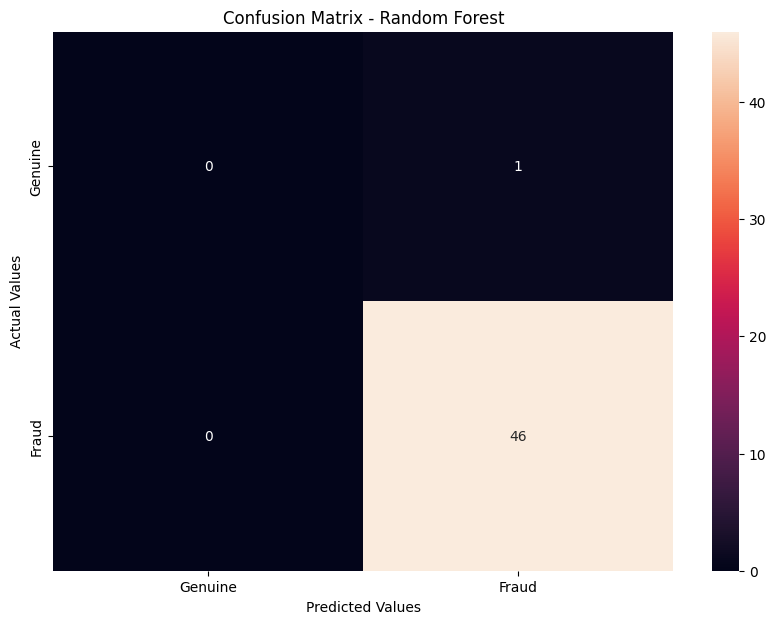

In [60]:
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(test_Y, Y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [68]:
print(type(Y_predictions_rf))


<class 'numpy.ndarray'>


In [72]:


Y_predictions_rf = pd.Series(Y_predictions_rf)
counts = Y_predictions_rf.value_counts()


In [73]:
Y_predictions_rf.value_counts()

1.0    47
dtype: int64

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame(Y_train)], axis=1)

# Separate minority and majority classes
fraud = train_data[train_data['Class'] == 1]
not_fraud = train_data[train_data['Class'] == 0]

# Upsample the minority class
fraud_upsampled = resample(fraud, replace=True, n_samples=len(not_fraud), random_state=42)

# Combine majority class with upsampled minority class
upsampled = pd.concat([not_fraud, fraud_upsampled])

# Split the upsampled dataset into features and target
X_train_upsampled = upsampled.drop('Class', axis=1)
Y_train_upsampled = upsampled['Class']

imputer = SimpleImputer(strategy='mean')
X_train_upsampled_imputed = imputer.fit_transform(X_train_upsampled)


# Train a model (Random Forest in this example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_upsampled, Y_train_upsampled)

X_test_imputed = imputer.transform(X_test)
Y_pred = model.predict(X_test_imputed)


In [74]:
Y_pred = model.predict(X_test)

Confusion Matrix:
 [[ 0  0]
 [ 7 25]]


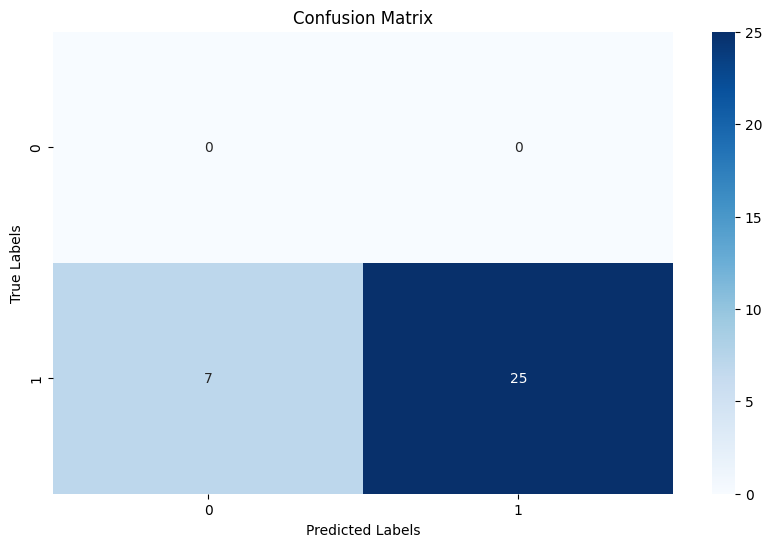

In [75]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

# Visualization
plt.figure(figsize=(10,6))
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree Scores

In [76]:
# Printing Evaluation Metrics for Decision Tree
metrics_df = [['Accuracy',(accuracy_score(test_Y, Y_predictions_dt))],
                         ['Precision',precision_score(test_Y, Y_predictions_dt)],
                         ['Recall', recall_score(test_Y, Y_predictions_dt)],
                         ['F1_score',f1_score(test_Y, Y_predictions_dt)]]
metrics_df_dt = pd.DataFrame(metrics_df, columns = ['Metrics', 'Results'])
metrics_df_dt

,Metrics,Results
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1_score,1.0


In [77]:
# Printing Accuracy for Decision Tree
metrics_df = (accuracy_score(test_Y, Y_predictions_dt))

metrics_df


1.0

In [80]:
print('Accuracy on training data:' , metrics_df)

Accuracy on training data: 1.0


In [79]:
print('Accuracy on testing data:' , test_data_accuracy)

NameError: ignored

Resultant Accuracy For Decision Tree

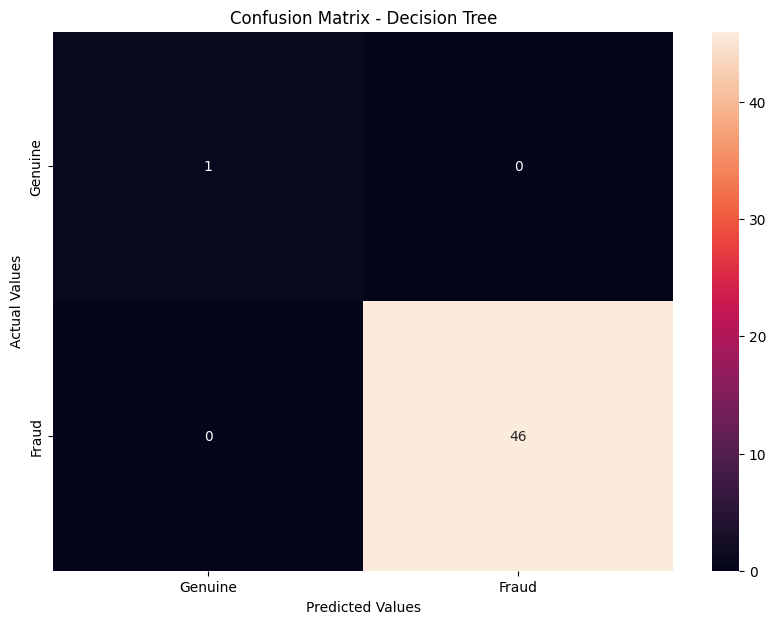

In [81]:
# Confusion Matrix for Decision Tree
confusion_matrix_dt = confusion_matrix(test_Y, Y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [82]:
# Printing Evaluation Metrics for Gradient Boosting
metrics_gb = [['Accuracy',(accuracy_score(test_Y, Y_prediction_gb))],
                         ['Precision',precision_score(test_Y, Y_prediction_gb)],
                         ['Recall', recall_score(test_Y, Y_prediction_gb)],
                         ['F1_score',f1_score(test_Y, Y_prediction_gb)]]
metrics_df_gb = pd.DataFrame(metrics_gb, columns = ['Metrics', 'Results'])
metrics_df_gb

,Metrics,Results
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1_score,1.0


In [83]:
metrics_gb = (accuracy_score(test_Y, Y_prediction_gb))
metrics_gb

1.0

In [84]:
print('Accuracy on training data:' , metrics_gb)

Accuracy on training data: 1.0


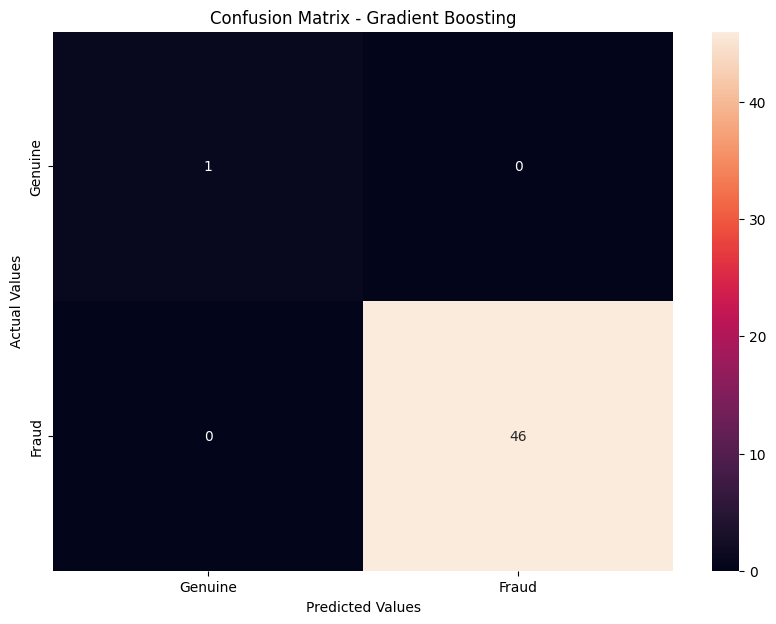

In [85]:
# Confusion Matrix for Gradient Boosting
confusion_matrix_gb = confusion_matrix(test_Y, Y_prediction_gb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Gradient Boosting')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [86]:
# Counting how many fraudulent and how many genuine transactions we have on the testing set
test_Y.value_counts()

1.0    46
0.0     1
Name: Class, dtype: int64

In [87]:
# Printing ROC AUC scores
from sklearn.metrics import roc_auc_score
print('Random Forest ROC AUC Score: ', (roc_auc_score(test_Y, Y_predictions_rf) * 100).round(2))
print('Decision Tree ROC AUC Score: ', (roc_auc_score(test_Y, Y_predictions_dt) *100).round(2))
print('Ada Boost ROC AUC Score: ', (roc_auc_score(test_Y, Y_predictions_ab) * 100).round(2))
print('Gradient Boost ROC AUC Score: ', (roc_auc_score(test_Y, Y_prediction_gb) * 100).round(2))

Random Forest ROC AUC Score:  50.0
Decision Tree ROC AUC Score:  100.0
Ada Boost ROC AUC Score:  100.0
Gradient Boost ROC AUC Score:  100.0


split the data into training data and testing data

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=  1)

In [89]:
print(X.shape, X_train.shape, X_test.shape)

(156, 30) (124, 30) (32, 30)


model training
Logistic Regresion

In [90]:
model = LogisticRegression()

In [91]:
#training the logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score


In [92]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [93]:
print('Accuracy on training data:' , training_data_accuracy)

Accuracy on training data: 1.0


In [94]:
metrics_lr = training_data_accuracy

In [95]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [96]:
print('Accuracy on testing data:' , test_data_accuracy)

Accuracy on testing data: 0.96875


Accuracy of all Models in single table:

In [97]:
model_names = ['Random Forest','Decison Tree','Gradient Boosting','Logistic Regression']

accuracy_scores = [+metrics_rf, +metrics_df, metrics_gb, metrics_lr]

data = {
    'Model': model_names,
    'Accuracy': accuracy_scores
}

accuracy_table = pd.DataFrame(data)
accuracy_table

,Model,Accuracy
0,Random Forest,1.0
1,Decison Tree,1.0
2,Gradient Boosting,1.0
3,Logistic Regression,1.0


Plotted Graph on the basis of accuracy of models:

                 Model  Accuracy
0        Random Forest       1.0
1         Decison Tree       1.0
2    Gradient Boosting       1.0
3  Logistic Regression       1.0


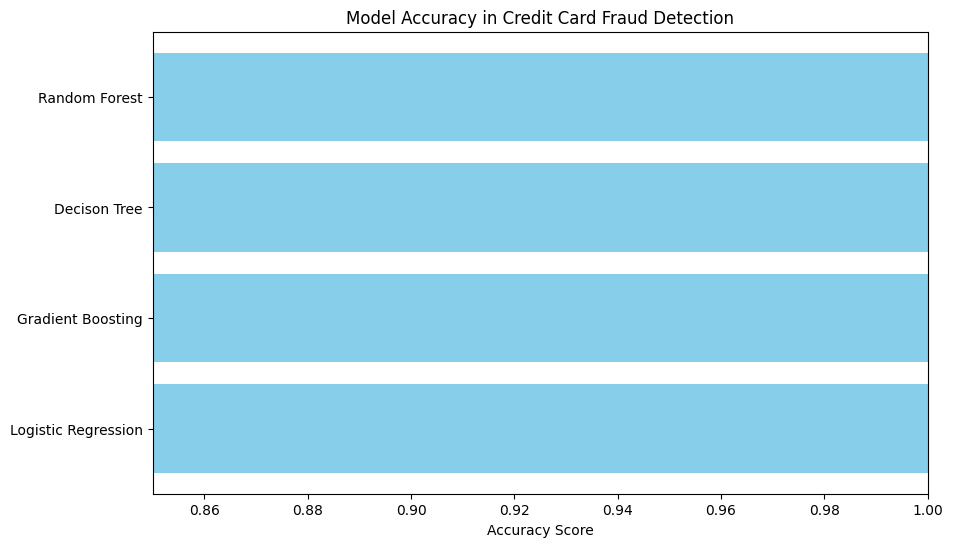

In [98]:
# Display the accuracy table
print(accuracy_table)
plt.figure(figsize=(10, 6))
plt.barh(accuracy_table['Model'], accuracy_table['Accuracy'], color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Model Accuracy in Credit Card Fraud Detection')
plt.xlim(0.85, 1.0)  # Adjust the x-axis limits as needed
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest accuracy at the top

plt.show()